<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 40px; margin: -10px -10px 20px -10px; border-radius: 0 0 15px 15px;">
<h1 style="margin: 0; font-size: 2.5em;">Analog Basics</h1>
<p style="margin: 10px 0 0 0; font-size: 1.2em; opacity: 0.9;">Week 1, Session 2 — Fab Futures</p>
</div>

## Contents

- [Quick Concepts](#quick-concepts) — *Start here if new to electronics*

1. [Wires & Interconnect](#1-wires--interconnect)
2. [Passive Components](#2-passive-components)
3. [The MOSFET Transistor](#3-the-mosfet-transistor)
4. [Transistors as Switches](#4-transistors-as-switches)
5. [Noise Margins](#5-noise-margins)
6. [Transistors as Amplifiers](#6-transistors-as-amplifiers)
7. [Device Models](#7-device-models)
8. [Power Distribution](#8-power-distribution)
9. [Clock Distribution](#9-clock-distribution)

---
<a id="quick-concepts"></a>
## Quick Concepts

This notebook uses some electrical concepts. Here's what you need to know:

### The Water Analogy

Electronics is invisible, but **water in pipes** behaves the same way:

| Electrical | Water Equivalent |
|------------|------------------|
| **Voltage** | Water pressure |
| **Current** | Flow rate (gallons/min) |
| **Resistance** | Narrow pipe or obstruction |
| **Capacitor** | Bucket |
| **Diode** | One-way valve |
| **Transistor** | Faucet (small force controls large flow) |
| **Wire** | Pipe |
| **Ground** | Drain / reservoir |

This analogy will help throughout the course:
- Higher pressure (voltage) through the same pipe → more flow (current)
- Narrow pipe (resistance) with the same pressure → less flow
- A bucket (capacitor) takes time to fill — bigger bucket or narrower inlet pipe = longer to fill

### Ohm's Law: V = I × R

The most important equation in electronics:

| Symbol | Meaning | Unit | Intuition |
|--------|---------|------|-----------|
| **V** | Voltage | Volts (V) | "Pressure" pushing electrons |
| **I** | Current | Amps (A) | Flow of electrons |
| **R** | Resistance | Ohms (Ω) | How hard it is to flow |

**Example**: If 1A flows through a 100Ω wire, the voltage drop is 1 × 100 = 100V.

### Capacitors Store Charge

A capacitor is like a **bucket** — it takes time to fill, and the fill rate depends on how fast water is flowing in:

$$\tau = R \times C$$

**τ (tau)** is the "time constant" — how long it takes to fill to ~63%. Bigger R (narrower pipe) or bigger C (bigger bucket) = slower filling.

### What is Doping?

Pure silicon doesn't conduct electricity well. **Doping** adds impurities to change this:

| Type | Impurity | Effect | Example |
|------|----------|--------|---------|
| **N-type** | Phosphorus, Arsenic | Extra electrons (negative carriers) | "n+" regions in transistors |
| **P-type** | Boron | Missing electrons = "holes" (positive carriers) | "p-substrate" |

When N and P regions meet, interesting things happen — that's how transistors work.

### Reading the Equations

This notebook shows some equations. You don't need to derive them — just understand what they *mean*:

- **Proportional (∝)**: "X ∝ Y" means "when Y goes up, X goes up"
- **Exponential (e^x)**: Very fast growth/decay — small changes have big effects
- **Slope**: How steep a curve is. Steep = rapid change. Flat = slow change.

---

In [1]:
# Setup
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch, Arc
import numpy as np

# For circuit-like drawings
plt.rcParams['font.family'] = 'monospace'

print("Setup complete.")

Setup complete.


---
<a id="1-wires--interconnect"></a>
# 1. Wires & Interconnect
---

### Metal Layers

Modern chips have **multiple metal layers** stacked on top of each other:

| Layer | Typical Use | Characteristics |
|-------|-------------|----------------|
| **M1** (lowest) | Local connections | Thinnest, highest resistance |
| **M2-M4** | Intermediate routing | Medium thickness |
| **Top metals** | Power, clock, long routes | Thickest, lowest resistance |

### Why Multiple Layers?

- Wires can **cross over** each other on different layers
- **Vias** connect between layers
- More routing resources = denser designs

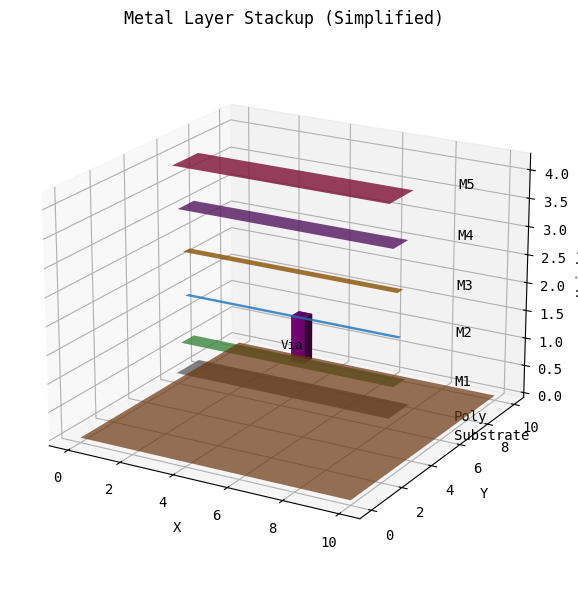

In [2]:
# Visualize metal stackup
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Colors for each layer
colors = ['#8B4513', '#808080', '#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#E91E63']
labels = ['Substrate', 'Poly', 'M1', 'M2', 'M3', 'M4', 'M5']
heights = [0, 0.5, 1.0, 1.8, 2.6, 3.4, 4.2]
thicknesses = [0.4, 0.1, 0.3, 0.4, 0.4, 0.5, 0.6]

for i, (color, label, z, thick) in enumerate(zip(colors, labels, heights, thicknesses)):
    # Draw each layer as a semi-transparent box
    if i == 0:  # Substrate - full
        xx, yy = np.meshgrid([0, 10], [0, 10])
        ax.plot_surface(xx, yy, np.ones_like(xx) * z, alpha=0.7, color=color)
    else:  # Metal layers - partial for visibility
        # Horizontal stripe
        xx, yy = np.meshgrid([1, 9], [4 + i*0.3, 6 - i*0.3])
        ax.plot_surface(xx, yy, np.ones_like(xx) * z, alpha=0.8, color=color)
    
    ax.text(11, 5, z + thick/2, label, fontsize=10)

# Add via between M1 and M2
ax.bar3d(5, 5, 1.0, 0.5, 0.5, 0.8, color='purple', alpha=0.9)
ax.text(5.2, 4, 1.4, 'Via', fontsize=9)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')
ax.set_title('Metal Layer Stackup (Simplified)', fontsize=12)
ax.view_init(elev=20, azim=-60)

plt.tight_layout()
plt.show()

### Wire Properties

Every wire has:

| Property | Symbol | Effect |
|----------|--------|--------|
| **Resistance** | R | Voltage drop, power loss, delay |
| **Capacitance** | C | Delay, power consumption |
| **Inductance** | L | Important at high frequencies |

The **RC delay** of a wire determines how fast signals can travel:

$$\tau = R \times C$$

---
<a id="2-passive-components"></a>
# 2. Passive Components
---

### Resistors

On-chip resistors can be made from:
- **Polysilicon** (poly resistors)
- **Diffusion** (in the substrate)
- **Metal** (usually for small values)

**Sheet resistance** ($R_\square$): resistance of a square of material

$$R = R_\square \times \frac{L}{W}$$

### Capacitors

Types available on-chip:
- **MOM** (Metal-Oxide-Metal): interdigitated metal fingers
- **MIM** (Metal-Insulator-Metal): parallel plates
- **MOS** (gate capacitor): transistor used as capacitor

### Inductors

- Made from **spiral metal traces**
- Large area, used mainly in RF designs
- Quality factor (Q) limited by metal resistance

/var/folders/vm/wfyvlqcx1nbcc7l_yn0sgjtm0000gn/T/ipykernel_27754/749521973.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, 'b-', linewidth=3, color='#9C27B0')


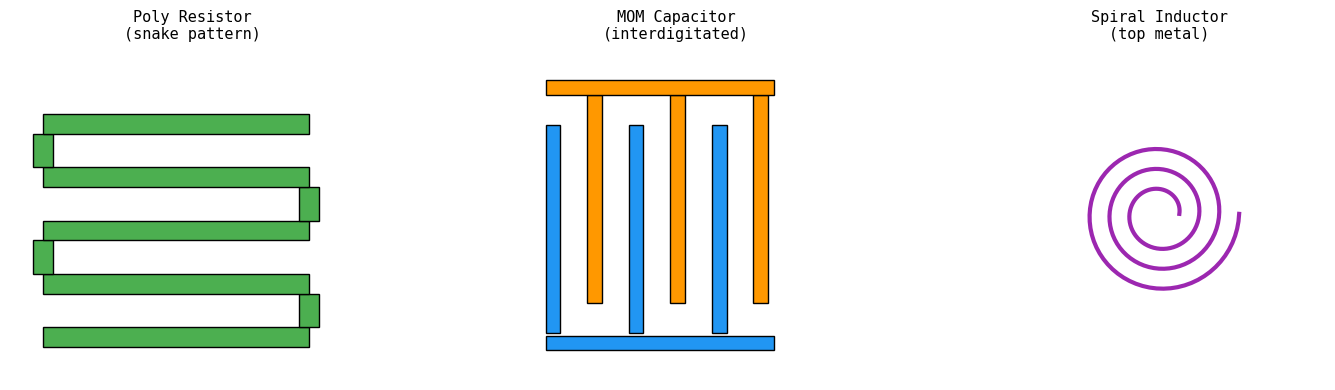

In [3]:
# Visualize on-chip passive components
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Resistor (poly snake)
ax = axes[0]
for i in range(5):
    y = i * 0.8
    if i % 2 == 0:
        ax.add_patch(patches.Rectangle((0.5, y), 4, 0.3, facecolor='#4CAF50', edgecolor='black'))
    else:
        ax.add_patch(patches.Rectangle((0.5, y), 4, 0.3, facecolor='#4CAF50', edgecolor='black'))
    if i < 4:
        x_conn = 4.5 if i % 2 == 0 else 0.5
        ax.add_patch(patches.Rectangle((x_conn - 0.15, y + 0.3), 0.3, 0.5, facecolor='#4CAF50', edgecolor='black'))
ax.set_xlim(0, 5.5)
ax.set_ylim(-0.5, 4.5)
ax.set_title('Poly Resistor\n(snake pattern)', fontsize=11)
ax.set_aspect('equal')
ax.axis('off')

# Capacitor (MOM - interdigitated)
ax = axes[1]
for i in range(6):
    x = i * 0.7 + 0.3
    if i % 2 == 0:
        ax.add_patch(patches.Rectangle((x, 0), 0.25, 3.5, facecolor='#2196F3', edgecolor='black'))
    else:
        ax.add_patch(patches.Rectangle((x, 0.5), 0.25, 3.5, facecolor='#FF9800', edgecolor='black'))
# Bus bars
ax.add_patch(patches.Rectangle((0.3, -0.3), 3.85, 0.25, facecolor='#2196F3', edgecolor='black'))
ax.add_patch(patches.Rectangle((0.3, 4.0), 3.85, 0.25, facecolor='#FF9800', edgecolor='black'))
ax.set_xlim(0, 5)
ax.set_ylim(-0.8, 4.8)
ax.set_title('MOM Capacitor\n(interdigitated)', fontsize=11)
ax.set_aspect('equal')
ax.axis('off')

# Inductor (spiral)
ax = axes[2]
theta = np.linspace(0, 6*np.pi, 200)
r = 0.3 + 0.15 * theta / np.pi
x = 2.5 + r * np.cos(theta)
y = 2.5 + r * np.sin(theta)
ax.plot(x, y, 'b-', linewidth=3, color='#9C27B0')
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_title('Spiral Inductor\n(top metal)', fontsize=11)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

---
<a id="3-the-mosfet-transistor"></a>
# 3. The MOSFET Transistor
---

The **MOSFET** (Metal-Oxide-Semiconductor Field-Effect Transistor) is the building block of all digital circuits.

### Structure

```
        Gate (G)
           │
      ─────┴─────   ← Gate oxide (very thin insulator)
     │           │
  Source (S)  Drain (D)
     │    ───    │
     └────┴──────┘  ← Channel region
         Body
```

### Two Types

| Type | Symbol | Turns ON when | Used for |
|------|--------|---------------|----------|
| **NMOS** | Gate = HIGH | Gate voltage > threshold | Pull-down (connect to GND) |
| **PMOS** | Gate = LOW | Gate voltage < (VDD - threshold) | Pull-up (connect to VDD) |

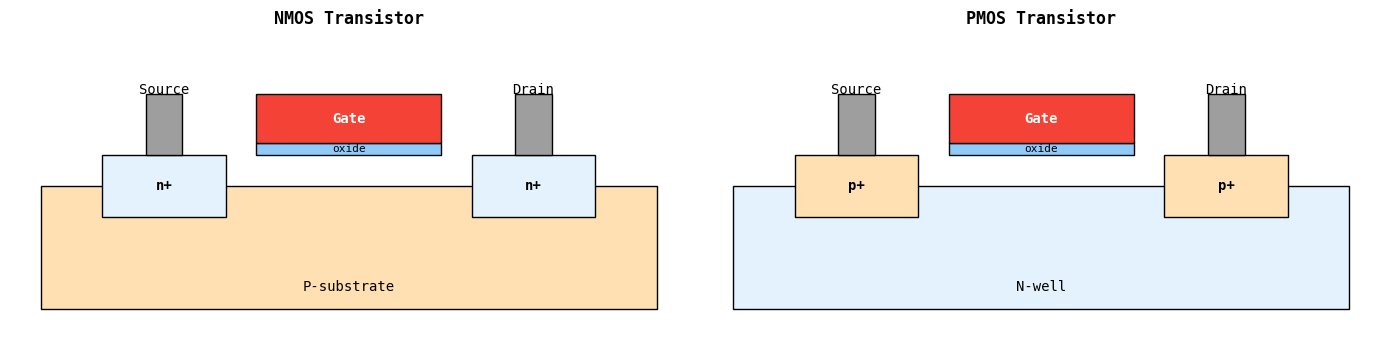

In [4]:
# MOSFET cross-section
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

def draw_mosfet(ax, nmos=True):
    # Substrate
    sub_color = '#FFE0B2' if nmos else '#E3F2FD'  # p-type or n-type
    ax.add_patch(patches.Rectangle((0, 0), 10, 2, facecolor=sub_color, edgecolor='black'))
    ax.text(5, 0.3, 'P-substrate' if nmos else 'N-well', ha='center', fontsize=10)
    
    # Source and Drain regions
    sd_color = '#E3F2FD' if nmos else '#FFE0B2'  # n+ or p+
    ax.add_patch(patches.Rectangle((1, 1.5), 2, 1, facecolor=sd_color, edgecolor='black'))
    ax.add_patch(patches.Rectangle((7, 1.5), 2, 1, facecolor=sd_color, edgecolor='black'))
    ax.text(2, 2, 'n+' if nmos else 'p+', ha='center', va='center', fontsize=10, fontweight='bold')
    ax.text(8, 2, 'n+' if nmos else 'p+', ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Gate oxide
    ax.add_patch(patches.Rectangle((3.5, 2.5), 3, 0.2, facecolor='#90CAF9', edgecolor='black'))
    ax.text(5, 2.6, 'oxide', ha='center', va='center', fontsize=8)
    
    # Gate
    ax.add_patch(patches.Rectangle((3.5, 2.7), 3, 0.8, facecolor='#F44336', edgecolor='black'))
    ax.text(5, 3.1, 'Gate', ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    
    # Labels
    ax.text(2, 3.5, 'Source', ha='center', fontsize=10)
    ax.text(8, 3.5, 'Drain', ha='center', fontsize=10)
    
    # Metal contacts
    ax.add_patch(patches.Rectangle((1.7, 2.5), 0.6, 1, facecolor='#9E9E9E', edgecolor='black'))
    ax.add_patch(patches.Rectangle((7.7, 2.5), 0.6, 1, facecolor='#9E9E9E', edgecolor='black'))
    
    ax.set_xlim(-0.5, 10.5)
    ax.set_ylim(-0.5, 4.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('NMOS Transistor' if nmos else 'PMOS Transistor', fontsize=12, fontweight='bold')

draw_mosfet(ax1, nmos=True)
draw_mosfet(ax2, nmos=False)

plt.tight_layout()
plt.show()

---
<a id="4-transistors-as-switches"></a>
# 4. Transistors as Switches
---

In digital circuits, we use transistors as **switches**:

### CMOS Inverter

The simplest logic gate - combines PMOS and NMOS:

```
        VDD
         │
       ┌─┴─┐
   ────┤ P ├──┬── Output
       └───┘  │
   Input      │
       ┌───┐  │
   ────┤ N ├──┘
       └─┬─┘
         │
        GND
```

| Input | PMOS | NMOS | Output |
|-------|------|------|--------|
| 0 (LOW) | ON | OFF | 1 (HIGH) |
| 1 (HIGH) | OFF | ON | 0 (LOW) |

In [ ]:
# Inverter transfer curve with noise margin markers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Transfer curve with noise margins
vin = np.linspace(0, 1.8, 500)
# Simplified tanh model for inverter
vout = 1.8 * (1 - np.tanh(8 * (vin - 0.9))) / 2

# Calculate slope to find VIL and VIH (where |slope| = 1)
dvout_dvin = np.gradient(vout, vin)

# Find points where slope = -1 (approximate)
vil_idx = np.argmin(np.abs(dvout_dvin + 1)[:len(vin)//2])  # First crossing
vih_idx = np.argmin(np.abs(dvout_dvin + 1)[len(vin)//2:]) + len(vin)//2  # Second crossing

VIL = vin[vil_idx]
VIH = vin[vih_idx]
VOH = vout[0]  # Output when input is 0
VOL = vout[-1]  # Output when input is VDD

ax1.plot(vin, vout, 'b-', linewidth=2.5, label='Vout vs Vin')

# Unity gain line (slope = -1)
ax1.plot(vin, 1.8 - vin, 'gray', linestyle=':', alpha=0.5, label='Slope = -1')

# Mark VIL and VIH
ax1.axvline(x=VIL, color='green', linestyle='--', alpha=0.7)
ax1.axvline(x=VIH, color='red', linestyle='--', alpha=0.7)
ax1.plot(VIL, vout[vil_idx], 'go', markersize=10)
ax1.plot(VIH, vout[vih_idx], 'ro', markersize=10)

# Mark VOL and VOH
ax1.axhline(y=VOL, color='purple', linestyle='--', alpha=0.5)
ax1.axhline(y=VOH, color='orange', linestyle='--', alpha=0.5)

# Annotate the four thresholds
ax1.annotate(f'VIL = {VIL:.2f}V', xy=(VIL, 0.1), fontsize=10, color='green',
            xytext=(VIL + 0.1, 0.3), arrowprops=dict(arrowstyle='->', color='green'))
ax1.annotate(f'VIH = {VIH:.2f}V', xy=(VIH, 0.1), fontsize=10, color='red',
            xytext=(VIH - 0.3, 0.3), arrowprops=dict(arrowstyle='->', color='red'))
ax1.text(0.05, VOH + 0.05, f'VOH = {VOH:.2f}V', fontsize=10, color='orange')
ax1.text(1.4, VOL + 0.05, f'VOL = {VOL:.2f}V', fontsize=10, color='purple')

# Shade valid input regions
ax1.fill_between([0, VIL], [1.8, 1.8], alpha=0.15, color='green', label=f'Input LOW region')
ax1.fill_between([VIH, 1.8], [0, 0], [1.8, 1.8], alpha=0.15, color='red', label=f'Input HIGH region')
ax1.fill_between([VIL, VIH], [0, 0], [1.8, 1.8], alpha=0.1, color='gray', label='Undefined')

ax1.set_xlabel('Vin (V)', fontsize=11)
ax1.set_ylabel('Vout (V)', fontsize=11)
ax1.set_title('Inverter Transfer Curve with Noise Margins', fontsize=12)
ax1.set_xlim(0, 1.8)
ax1.set_ylim(0, 1.8)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='right', fontsize=9)

# Noise margin visualization
ax2.set_xlim(0, 3)
ax2.set_ylim(0, 2)

# Draw voltage rails
ax2.plot([0.5, 0.5], [0, 1.8], 'k-', linewidth=3)
ax2.plot([2.5, 2.5], [0, 1.8], 'k-', linewidth=3)

# Output levels
ax2.fill_between([0.3, 0.7], [0, 0], [VOL, VOL], color='purple', alpha=0.6, label='VOL')
ax2.fill_between([0.3, 0.7], [VOH, VOH], [1.8, 1.8], color='orange', alpha=0.6, label='VOH')

# Input levels
ax2.fill_between([2.3, 2.7], [0, 0], [VIL, VIL], color='green', alpha=0.6, label='Valid LOW')
ax2.fill_between([2.3, 2.7], [VIH, VIH], [1.8, 1.8], color='red', alpha=0.6, label='Valid HIGH')

# Noise margins (arrows)
# NML
ax2.annotate('', xy=(1.5, VIL), xytext=(1.5, VOL),
            arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
ax2.text(1.55, (VIL + VOL)/2, f'NML\n{VIL - VOL:.2f}V', fontsize=10, color='blue', va='center')

# NMH  
ax2.annotate('', xy=(1.5, VOH), xytext=(1.5, VIH),
            arrowprops=dict(arrowstyle='<->', color='blue', lw=2))
ax2.text(1.55, (VOH + VIH)/2, f'NMH\n{VOH - VIH:.2f}V', fontsize=10, color='blue', va='center')

ax2.text(0.5, -0.2, 'Output', ha='center', fontsize=11)
ax2.text(2.5, -0.2, 'Input', ha='center', fontsize=11)

ax2.set_title('Noise Margin Diagram', fontsize=12)
ax2.axis('off')

plt.tight_layout()
plt.show()

### Building Other Gates

All logic gates are built from NMOS/PMOS combinations:

| Gate | NMOS | PMOS |
|------|------|------|
| **NAND** | Series (both must be ON to pull low) | Parallel (either pulls high) |
| **NOR** | Parallel (either pulls low) | Series (both must be ON to pull high) |

---
<a id="5-noise-margins"></a>
# 5. Noise Margins
---

**Noise margin** tells you how much noise a digital signal can tolerate before being misinterpreted.

### The Four Threshold Voltages

Looking at the inverter transfer curve, we define four critical voltages:

| Parameter | Name | Definition |
|-----------|------|------------|
| **VIL** | Input Low | Max input voltage recognized as LOW |
| **VIH** | Input High | Min input voltage recognized as HIGH |
| **VOL** | Output Low | Max output voltage when driving LOW |
| **VOH** | Output High | Min output voltage when driving HIGH |

### How to Find Them

From the transfer curve, find where the slope = -1:

```
Vout                                      
  │ VOH ─────────┐
  │              │\
  │              │ \  Slope = -1 defines VIL
  │              │  \
  │ VM  ─ ─ ─ ─ ─│─ ─X─ ─ ─ ─ Unity gain point (slope = -1)
  │              │    \
  │              │     \  Slope = -1 defines VIH  
  │              │      \
  │ VOL ─────────│───────\─────────
  │              │        │
  └──────────────┼────────┼────── Vin
               VIL      VIH
```

### Calculating Noise Margins

The two noise margins are:

$$NM_L = V_{IL} - V_{OL}$$
$$NM_H = V_{OH} - V_{IH}$$

| Margin | What it means |
|--------|---------------|
| **NML** (Low) | How much noise can be added to a LOW signal |
| **NMH** (High) | How much noise can be added to a HIGH signal |

### Example: 1.8V CMOS

For a well-designed 1.8V inverter:

| Parameter | Typical Value |
|-----------|---------------|
| VOH | ~1.75V |
| VOL | ~0.05V |
| VIH | ~0.95V |
| VIL | ~0.85V |
| **NMH** | 1.75 - 0.95 = **0.80V** |
| **NML** | 0.85 - 0.05 = **0.80V** |

**Interpretation**: The circuit can tolerate up to 0.8V of noise on either logic level.

### Why This Matters

- **Longer wires** pick up more noise → need adequate margins
- **Lower supply voltage** (1.8V → 1.2V → 0.8V) → smaller margins
- **Process variation** can shift thresholds → design for worst case
- **Temperature** affects thresholds → check hot and cold corners

A design with **symmetric** margins (NML ≈ NMH) is well-balanced. If one margin is much smaller than the other, that's the weak point where noise can cause failures.

---
<a id="6-transistors-as-amplifiers"></a>
# 6. Transistors as Amplifiers
---

In **analog circuits**, transistors operate in the *saturation region* to amplify signals.

### Regions of Operation

| Region | Condition | Behavior |
|--------|-----------|----------|
| **Cutoff** | Vgs < Vth | No current (OFF) |
| **Linear/Triode** | Vgs > Vth, Vds < Vgs-Vth | Acts like a resistor |
| **Saturation** | Vgs > Vth, Vds > Vgs-Vth | Current controlled by Vgs (amplifier) |

### Key Parameter: Transconductance (gm)

$$g_m = \frac{\partial I_D}{\partial V_{GS}}$$

This tells us how much the output current changes for a small change in gate voltage - the "gain" of the transistor.

**Note on threshold voltage**: The plots below use Vth = 0.4V for illustration. Actual Sky130 PDK transistors have different thresholds depending on flavor: standard (svt) ~0.5V, low-Vth (lvt) ~0.35V, high-Vth (hvt) ~0.65V. Real devices also exhibit short-channel effects (threshold roll-off, DIBL) not captured in this simple square-law model.

### Subthreshold Region (Weak Inversion)

The table above shows the traditional "strong inversion" regions. But there's another important region:

**Subthreshold** (Vgs < Vth): Current doesn't go to zero—it falls *exponentially*:

$$I_D \propto e^{(V_{GS} - V_{th}) / (n \cdot V_T)}$$

where $V_T = kT/q \approx 26 mV$ at room temperature.

> **What's kT/q?** This is the "thermal voltage" — a fundamental constant that appears whenever temperature affects electronics. At room temperature (~25°C), it's about 26 millivolts. You don't need to memorize the physics; just know that **temperature matters** for transistor behavior, and this constant captures that effect.

| Region | Current | Use Case |
|--------|---------|----------|
| **Strong inversion** | Quadratic (Vgs > Vth) | High-speed digital, most analog |
| **Weak inversion** | Exponential (Vgs < Vth) | Ultra-low power, sensors |

**Why it matters:**
- Leakage current in "off" transistors is subthreshold current
- At advanced nodes, leakage can dominate idle power
- Ultra-low-power designs intentionally operate in subthreshold (slower but very efficient)

For our 130nm educational designs, subthreshold leakage is small enough to ignore. But at 28nm and below, it becomes a major concern.

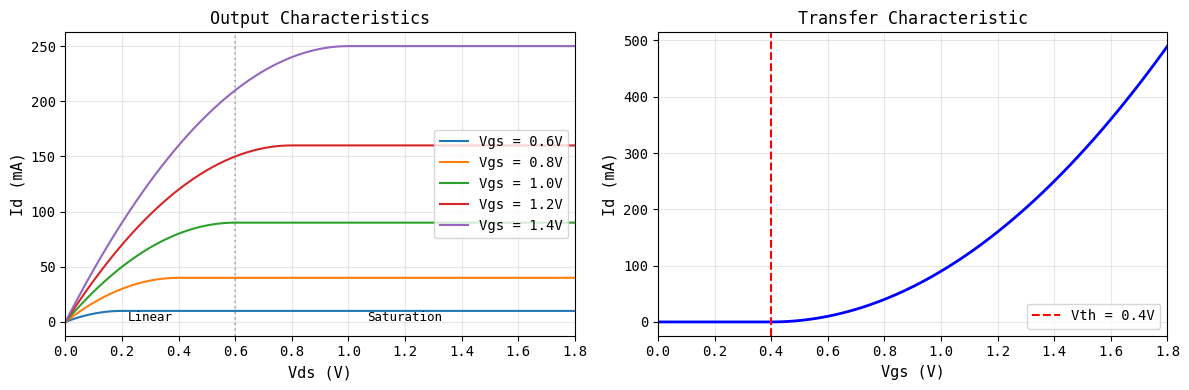

In [6]:
# MOSFET I-V characteristics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Parameters
Vth = 0.4  # Threshold voltage
k = 0.5    # Transconductance parameter

# Output characteristics (Id vs Vds for different Vgs)
Vds = np.linspace(0, 1.8, 100)
for Vgs in [0.6, 0.8, 1.0, 1.2, 1.4]:
    Id = np.zeros_like(Vds)
    for i, vds in enumerate(Vds):
        if Vgs <= Vth:
            Id[i] = 0  # Cutoff
        elif vds < Vgs - Vth:
            Id[i] = k * ((Vgs - Vth) * vds - 0.5 * vds**2)  # Linear
        else:
            Id[i] = 0.5 * k * (Vgs - Vth)**2  # Saturation
    ax1.plot(Vds, Id * 1000, label=f'Vgs = {Vgs}V')

ax1.set_xlabel('Vds (V)', fontsize=11)
ax1.set_ylabel('Id (mA)', fontsize=11)
ax1.set_title('Output Characteristics', fontsize=12)
ax1.legend(loc='right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 1.8)

# Mark regions
ax1.axvline(x=0.6, color='gray', linestyle=':', alpha=0.5)
ax1.text(0.3, 0.5, 'Linear', fontsize=9, ha='center')
ax1.text(1.2, 0.5, 'Saturation', fontsize=9, ha='center')

# Transfer characteristic (Id vs Vgs)
Vgs = np.linspace(0, 1.8, 100)
Id = np.maximum(0, 0.5 * k * (Vgs - Vth)**2)
Id[Vgs < Vth] = 0

ax2.plot(Vgs, Id * 1000, 'b-', linewidth=2)
ax2.axvline(x=Vth, color='red', linestyle='--', label=f'Vth = {Vth}V')
ax2.set_xlabel('Vgs (V)', fontsize=11)
ax2.set_ylabel('Id (mA)', fontsize=11)
ax2.set_title('Transfer Characteristic', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 1.8)

plt.tight_layout()
plt.show()

---
<a id="7-device-models"></a>
# 7. Device Models
---

### SPICE Models

To simulate circuits, we need mathematical models of transistors. **SPICE** uses hierarchical model levels:

| Level | Complexity | Use Case |
|-------|------------|----------|
| **Level 1** | Simple square-law | Quick estimates |
| **Level 3** | Short-channel effects | Legacy |
| **BSIM3/4** | Industry standard | Accurate analog |
| **PSP** | Surface-potential based | Advanced modeling |

### Model Parameters

Key parameters you'll see:

| Parameter | Meaning |
|-----------|--------|
| **VTH0** | Threshold voltage |
| **TOX** | Gate oxide thickness |
| **U0** | Mobility |
| **VSAT** | Saturation velocity |

---
<a id="8-power-distribution"></a>
# 8. Power Distribution
---

### Power Grid

Getting power to all transistors requires a **power grid**:

- **VDD** (positive supply) and **GND** rails
- Uses wide metal traces on upper layers
- Multiple vias to reduce resistance

### IR Drop

Current flowing through resistive wires causes **voltage drop**:

$$\Delta V = I \times R$$

This means transistors far from power pads see lower voltage → slower operation.

### Decoupling Capacitors

Placed near transistors to:
- Supply instantaneous current during switching
- Filter power supply noise

---
<a id="9-clock-distribution"></a>
# 9. Clock Distribution
---

### The Challenge

All flip-flops need to receive the clock at (nearly) the same time.

**Clock skew**: difference in clock arrival time between two flip-flops

If skew is too large → timing failures!

### Solutions

| Approach | Description |
|----------|-------------|
| **H-tree** | Balanced binary tree structure |
| **Clock mesh** | Grid of clock wires, shorted together |
| **Clock buffers** | Amplify and balance clock signals |

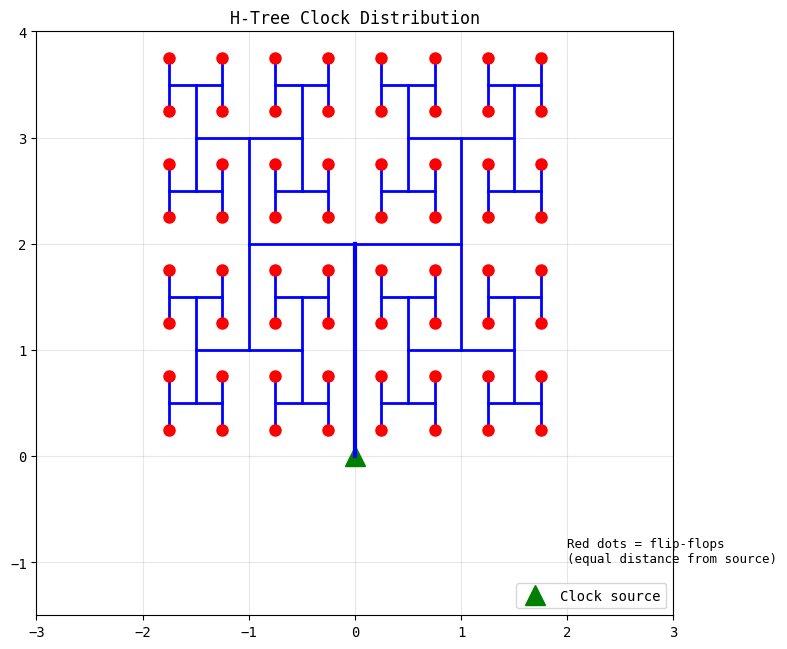

In [7]:
# H-tree clock distribution
fig, ax = plt.subplots(figsize=(8, 8))

def draw_h_tree(ax, x, y, size, depth):
    if depth == 0:
        ax.plot(x, y, 'ro', markersize=8)  # Flip-flop
        return
    
    # Horizontal line
    ax.plot([x - size/2, x + size/2], [y, y], 'b-', linewidth=2)
    
    # Vertical lines at ends
    ax.plot([x - size/2, x - size/2], [y - size/2, y + size/2], 'b-', linewidth=2)
    ax.plot([x + size/2, x + size/2], [y - size/2, y + size/2], 'b-', linewidth=2)
    
    # Recurse
    draw_h_tree(ax, x - size/2, y + size/2, size/2, depth - 1)
    draw_h_tree(ax, x - size/2, y - size/2, size/2, depth - 1)
    draw_h_tree(ax, x + size/2, y + size/2, size/2, depth - 1)
    draw_h_tree(ax, x + size/2, y - size/2, size/2, depth - 1)

# Draw from center
ax.plot(0, 0, 'g^', markersize=15, label='Clock source')
ax.plot([0, 0], [0, 2], 'b-', linewidth=3)
draw_h_tree(ax, 0, 2, 2, 3)

ax.set_xlim(-3, 3)
ax.set_ylim(-1.5, 4)
ax.set_aspect('equal')
ax.set_title('H-Tree Clock Distribution', fontsize=12)
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)

# Add explanation
ax.text(2, -1, 'Red dots = flip-flops\n(equal distance from source)', fontsize=9)

plt.tight_layout()
plt.show()

---
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 30px; margin: 20px -10px -10px -10px; border-radius: 15px 15px 0 0; text-align: center;">

## Summary

- **Wires** have R, C, and L that affect signal propagation
- **MOSFETs** are the fundamental building block
- In **digital circuits**, transistors act as switches
- In **analog circuits**, transistors act as amplifiers
- **Power** and **clock distribution** are critical for large designs

### Homework
1. Simulate a PDK inverter in SPICE
2. Measure delay from input to output
3. Sweep input slew rate - how does it affect delay?

</div>